In [1]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open','value','address','mined'])
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
print(df.tail())
df.to_csv('../Resources/colabbtc.csv')
#https://towardsdatascience.com/bitcoin-price-prediction-using-time-series-forecasting-9f468f7174d3

C:\Users\16474\AppData\Local\Temp\ipykernel_2312\87143007.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            Unnamed: 0    price
date                           
2022-10-21        4381  19162.6
2022-10-22        4382  19204.8
2022-10-23        4383  19571.2
2022-10-24        4384  19331.5
2022-10-25        4385  20073.1


In [2]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

<class 'pandas.core.frame.DataFrame'>
            Unnamed: 0  price
date                         
2010-09-25           0    0.1
2010-09-26           1    0.1
2010-09-27           2    0.1
2010-09-28           3    0.1
2010-09-29           4    0.1


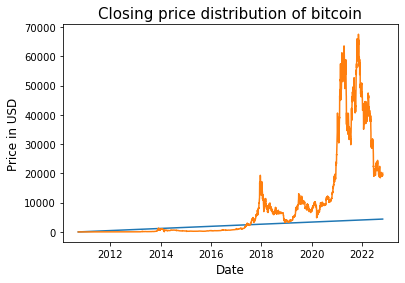

In [3]:
print (type(df))
print (df.head())
plot.plot(df)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

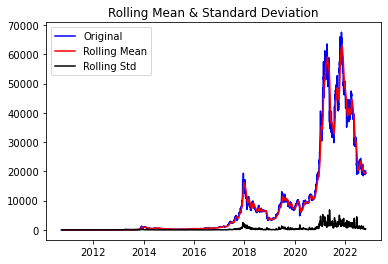

ADF Stastistic: -1.769203
p-value: 0.395855
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [4]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = df['price']      
test_stationarity(ts)

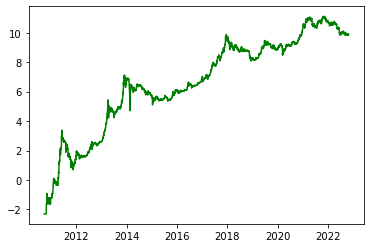

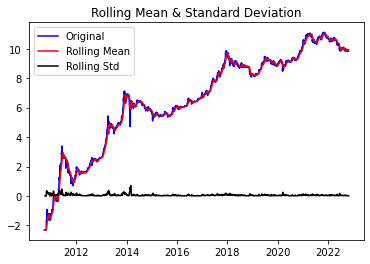

ADF Stastistic: -3.182831
p-value: 0.021000
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [5]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

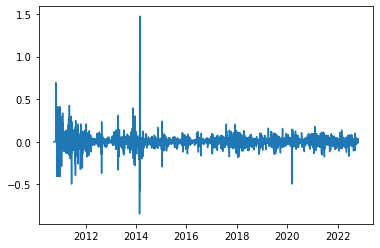

In [6]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

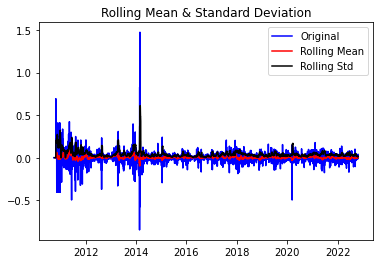

ADF Stastistic: -25.023770
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [7]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [13]:
df = ts_log_diff.reset_index

In [14]:
df

<bound method Series.reset_index of date
2010-09-26    0.000000
2010-09-27    0.000000
2010-09-28    0.000000
2010-09-29    0.000000
2010-09-30    0.000000
                ...   
2022-10-21    0.006266
2022-10-22    0.002200
2022-10-23    0.018899
2022-10-24   -0.012323
2022-10-25    0.037645
Name: price, Length: 4385, dtype: float64>